<h1 align="center">Uczenie nadzorowane - predykcja</h1>
<h2 align="center">Dominik Sakłaski, 415120</h2>


#### Załadowanie bibliotek 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson


1.     Pobierz dane dla Boston Housing Dataset

Boston Housing Dataset to popularny zbiór danych stosowany w dziedzinie uczenia maszynowego do zadań regresji. Zbiór ten zawiera informacje na temat cen domów w różnych dzielnicach miasta Boston w latach 70-tych. Zbiór składa się z 506 rekordów i 13 atrybutów, w tym cechy takie jak średnia liczba pokoi, odległość od pięciu dużych centrów zatrudnienia czy wskaźnik przestępczości na mieszkańca. Zbiór ten pozwala na naukę różnych technik regresji, od prostych modeli liniowych po bardziej złożone modele bazujące na sieciach neuronowych czy algorytmach drzew decyzyjnych.

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

##### Opis zmiennych w Boston Housing Dataset

- `CRIM` – wskaźnik przestępczości na osobę w przeliczeniu na miasto  
- `ZN` – procent terenów mieszkaniowych przeznaczonych pod działki powyżej 25 000 stóp²  
- `INDUS` – procent terenów niehandlowych (przemysłowych) w mieście  
- `CHAS` – przyleganie do rzeki Charles (1 = tak, 0 = nie)  
- `NOX` – stężenie tlenków azotu (części na 10 milionów)  
- `RM` – średnia liczba pokoi w mieszkaniu  
- `AGE` – procent jednostek mieszkalnych zbudowanych przed 1940 rokiem  
- `DIS` – ważona odległość do 5 centrów zatrudnienia w Bostonie  
- `RAD` – wskaźnik dostępności do autostrad radialnych  
- `TAX` – podatek od nieruchomości (na $10 000 wartości)  
- `PTRATIO` – stosunek liczby uczniów do nauczycieli  
- `B` – 1000(Bk − 0.63)², gdzie Bk to odsetek osób czarnoskórych w danym obszarze  
- `LSTAT` – procent mieszkańców o niskim statusie ekonomicznym  
- `MEDV` – mediana ceny domów (w tysiącach dolarów) – **zmenna celu**


https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
         'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

dataset = pd.read_csv(url, sep='\s+', names=names)

2.     Wykonaj podstawową Exploratory Data Analysis (EDA) na zbiorze danych, aby zrozumieć jego strukturę i charakterystyki. Możesz użyć bibliotek takich jak pandas, numpy, matplotlib i seaborn. W szczególności sprawdź współliniowość zmiennych.

In [3]:
print("\nInformacje o zbiorze:")
print(dataset.info())

print("\nStatystyki opisowe:")
display(dataset.describe())

print("\nSprawdzenie braków danych:")
print(dataset.isnull().sum())


Informacje o zbiorze:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Statystyki opisowe:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



Sprawdzenie braków danych:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


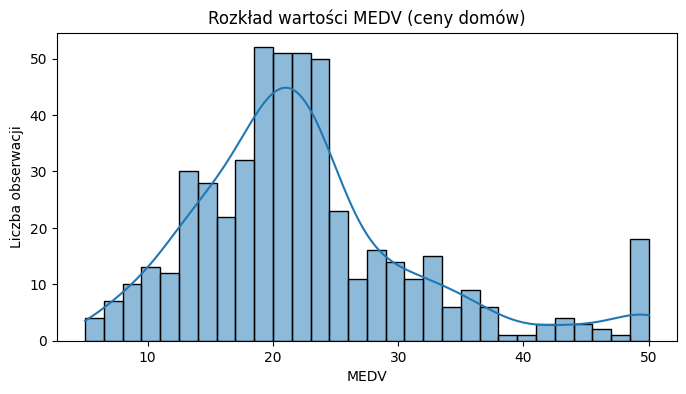

In [4]:
# rozkład - histogram
plt.figure(figsize=(8, 4))
sns.histplot(dataset['MEDV'], kde=True, bins=30)
plt.title('Rozkład wartości MEDV (ceny domów)')
plt.xlabel('MEDV')
plt.ylabel('Liczba obserwacji')
plt.show()


Histogram pokazuje, że rozkład cen domów (MEDV) nie jest symetryczny – jest prawoskośny. Większość domów ma wartość między 15 a 25 tysięcy dolarów, ale widoczny jest także „sufit” w okolicach 50 tysięcy, co sugeruje istnienie ograniczenia górnego w danych.

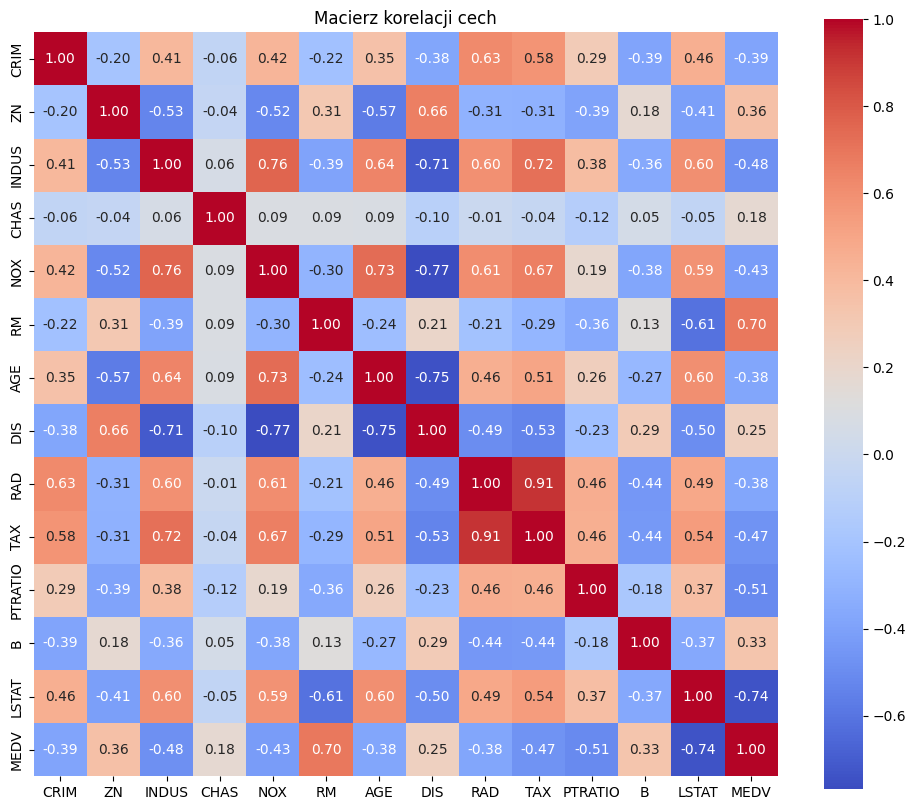

In [5]:
# korelacja - zbadanie wspołliniowości zmiennych
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Macierz korelacji cech')
plt.show()


In [6]:
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

corr_val = (
    upper.stack()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'level_0': 'Zmienne 1', 'level_1': 'Zmienne 2', 0: 'Korelacja'})
)

print("5 par zmiennych o najwyższej korelacji:")
print(corr_val.head(5))
print("5 par zmiennych o najniższej korelacji:")
print(corr_val.tail(5))

5 par zmiennych o najwyższej korelacji:
  Zmienne 1 Zmienne 2  Korelacja
0       RAD       TAX   0.910228
1     INDUS       NOX   0.763651
2       NOX       AGE   0.731470
3     INDUS       TAX   0.720760
4        RM      MEDV   0.695360
5 par zmiennych o najniższej korelacji:
   Zmienne 1 Zmienne 2  Korelacja
86        RM     LSTAT  -0.613808
87     INDUS       DIS  -0.708027
88     LSTAT      MEDV  -0.737663
89       AGE       DIS  -0.747881
90       NOX       DIS  -0.769230


a) Top 5 najwyższych korelacji dodatnich (poza korelacjami własnymi):
RAD i TAX – r = 0.91
→ Bardzo silna dodatnia korelacja, zmienne mogą zawierać zbliżoną informację o infrastrukturze drogowej i podatkowej.

INDUS i NOX – r = 0.76
→ Im większy udział terenów przemysłowych, tym wyższe stężenie tlenków azotu – logiczne i oczekiwane powiązanie.

NOX i AGE – r = 0.73
→ Starsze budynki częściej występują w bardziej zanieczyszczonych obszarach.

INDUS i TAX – r = 0.70
→ Tereny przemysłowe mogą wiązać się z wyższymi podatkami lokalnymi.

RM i MEDV – r = 0.69
→ Więcej pokoi w domu zazwyczaj oznacza wyższą wartość nieruchomości.

b) Top 5 najwyższych korelacji ujemnych:
RM i LSTAT – r = -0.61
→ Im więcej pokoi, tym mniejszy odsetek osób o niższym statusie społecznym.

INDUS i DIS – r = -0.71
→ Im więcej przemysłu, tym mniejsza odległość do centrów zatrudnienia.

NOX i DIS – r = -0.77
→ Wysokie stężenie NOX występuje bliżej centrów miast (DIS mniejsze).

AGE i DIS – r = -0.75
→ Starsze budynki występują bliżej centrum.

NOX i MEDV – r = -0.77
→ Zanieczyszczenie powietrza (NOX) jest silnie negatywnie powiązane z cenami domów.

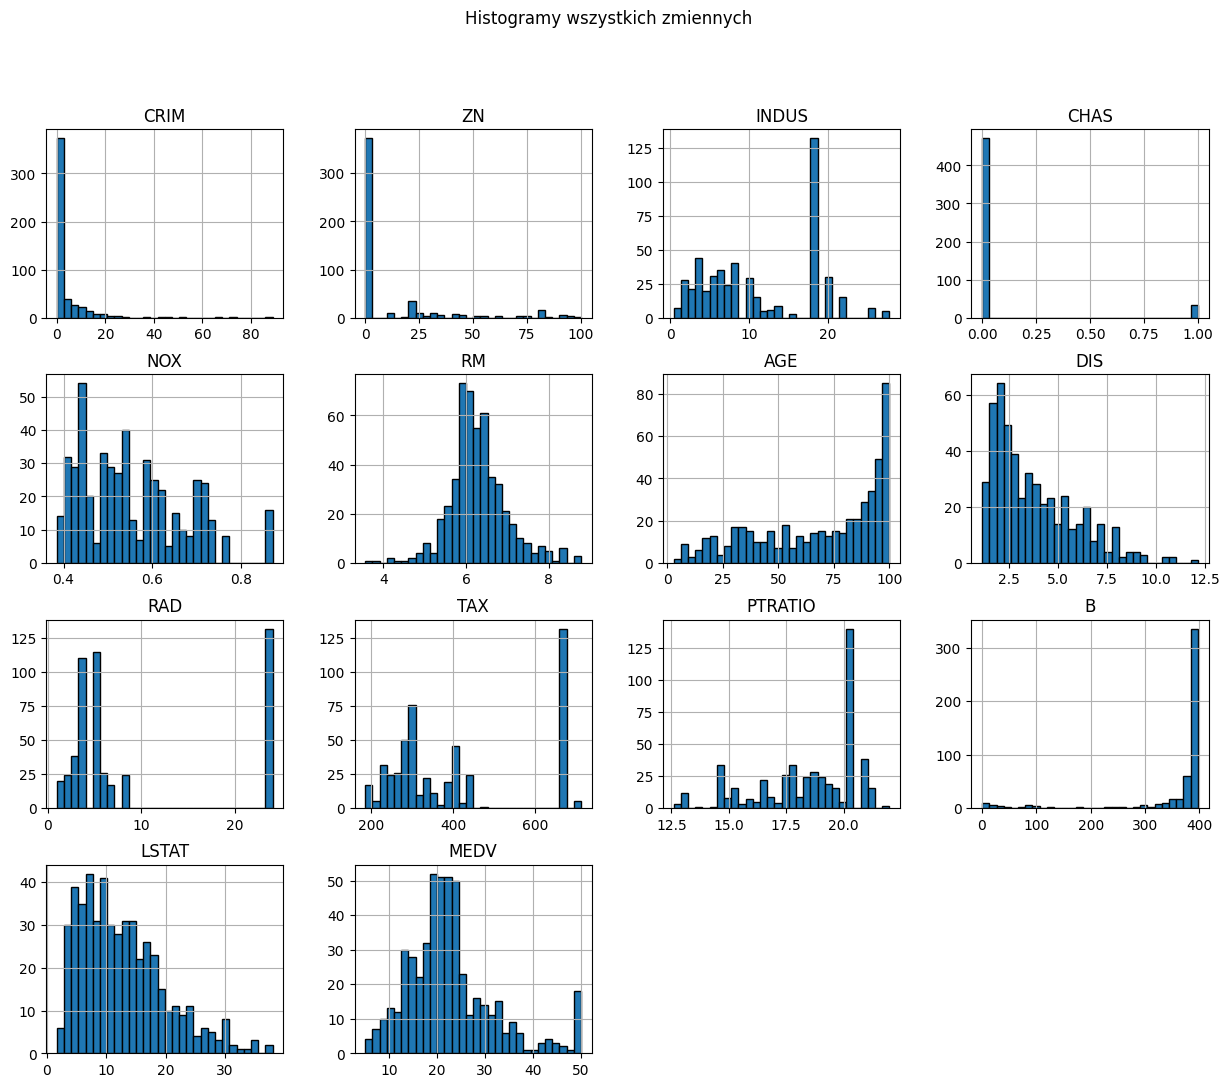

In [7]:
# histogramy dla wszyztskich zmiennych
dataset.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle('Histogramy wszystkich zmiennych')
plt.show()

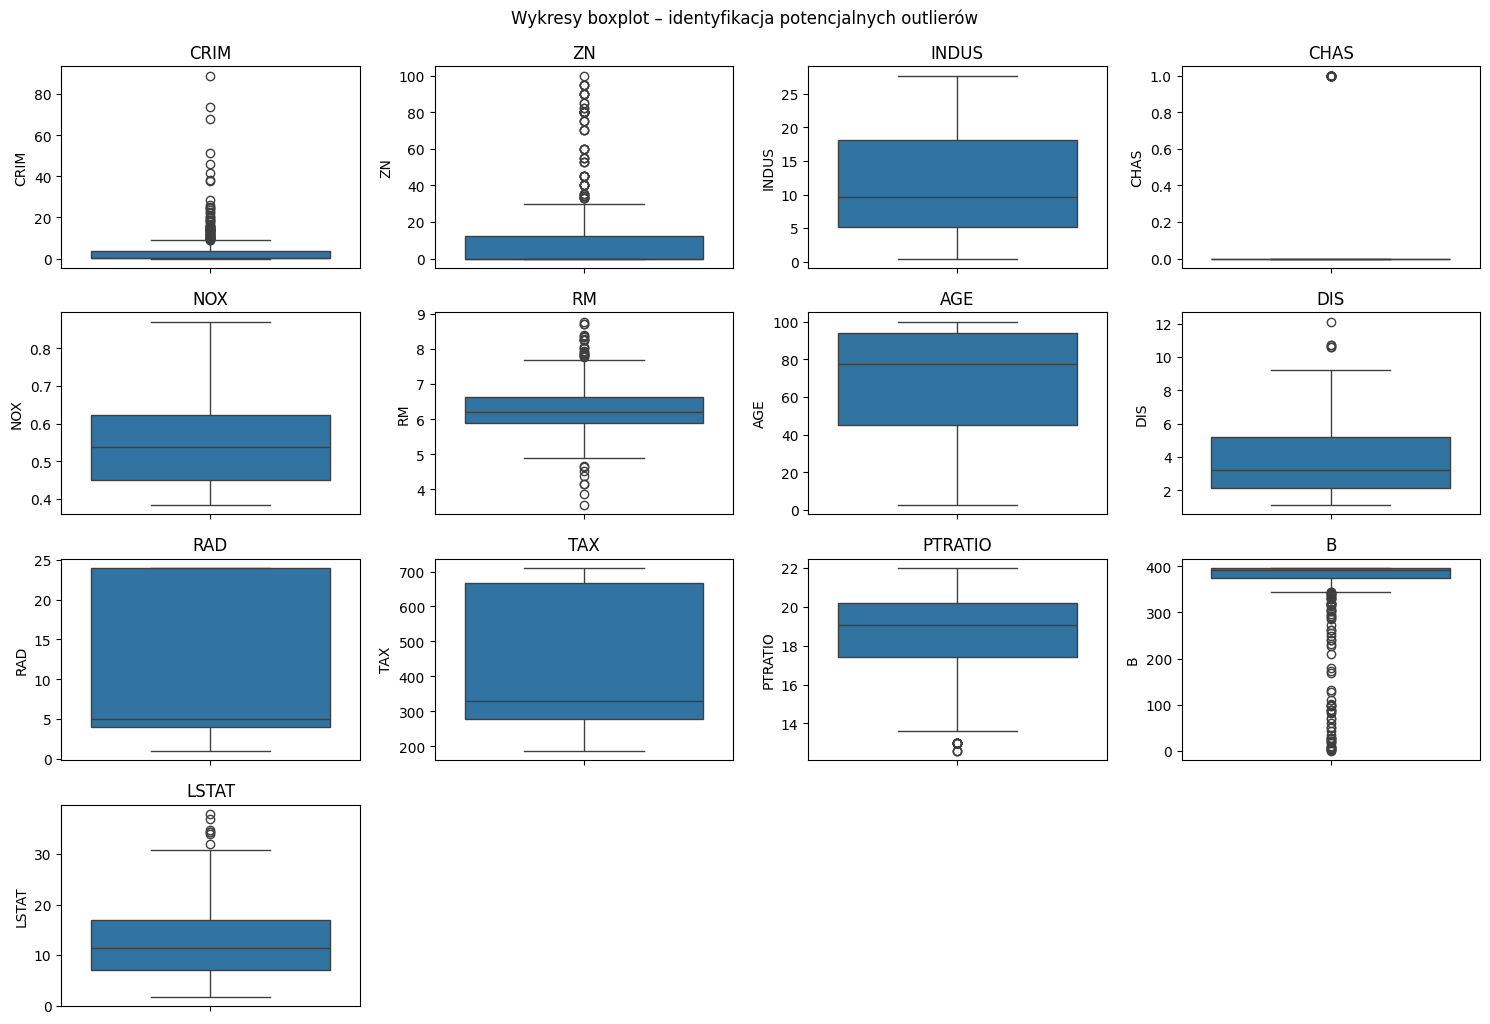

In [8]:
plt.figure(figsize=(15, 10))
for idx, column in enumerate(dataset.columns[:-1], 1):  # Pomijamy MEDV
    plt.subplot(4, 4, idx)
    sns.boxplot(y=dataset[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle("Wykresy boxplot – identyfikacja potencjalnych outlierów", y=1.02)
plt.show()

3.     Podziel zbiór danych na zbiór treningowy i testowy. Możesz użyć funkcji train_test_split z biblioteki sklearn.

In [9]:
X = dataset.drop('MEDV', axis=1) 
y = dataset['MEDV']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:",  X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:",  y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


4.     Zbadaj różne modele takie jak regresja liniowa i XGBoost. Wykorzystaj bibliotekę sklearn, aby stworzyć modele i dopasować je do zbioru treningowego.

In [10]:
# Regresja liniowa
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [11]:
# XGBoost

xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',   
    colsample_bytree=0.3,              
    learning_rate=0.1,                 
    max_depth=5,                      
    alpha=10,                          
    n_estimators=10                    
)

xg_reg.fit(X_train, y_train)
y_pred_xg = xg_reg.predict(X_test)
print('XGBoost - MSE: ', mean_squared_error(y_test, y_pred_xg))
print('XGBoost - MAE: ', mean_absolute_error(y_test, y_pred_xg))
print('XGBoost - R2: ', r2_score(y_test, y_pred_xg))


XGBoost - MSE:  34.38827278702372
XGBoost - MAE:  3.8391113281249996
XGBoost - R2:  0.531071883856806


5.     Zastosuj GridSearchCV, aby dobrać optymalne hiperparametry dla modelu XGBoost. Możesz użyć różnych metryk ewaluacyjnych, takich jak MSE, RMSE, MAE, R2.

Porównaj wyniki różnych modeli na zbiorze testowym, wykorzystując wybrane metryki ewaluacyjne.



In [12]:
params = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.17],
    'max_depth': [1, 3, 4, 5, 7, 11],
    'n_estimators': [50, 100, 200, 150, 300 ,400]
}
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3)
grid = GridSearchCV(
    estimator=xg_reg,
    param_grid=params,
    cv=5,
    scoring='neg_mean_squared_error'
)
grid.fit(X_train, y_train)
#y_pred_xg = grid.best_estimator_.predict(X_test)

print("Best score: %f using params: %s" % (grid.best_score_, grid.best_params_))


Best score: -13.637975 using params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [13]:
y_pred_lr = lr.predict(X_test)
print('Linear Regression - MSE:', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression - RMSE: ', np.sqrt(mean_absolute_error(y_test, y_pred_lr)))
print('Linear Regression - MAE:', mean_absolute_error(y_test, y_pred_lr))
print('Linear Regression - R2:',  r2_score(y_test, y_pred_lr))

y_pred_xg = grid.predict(X_test)

print('XGBoost - MSE:', mean_squared_error(y_test, y_pred_xg))
print('XGBoost - RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_xg)))
print('XGBoost - MAE:', mean_absolute_error(y_test, y_pred_xg))
print('XGBoost - R2:',  r2_score(y_test, y_pred_xg))


Linear Regression - MSE: 24.291119474973538
Linear Regression - RMSE:  1.7858028911074821
Linear Regression - MAE: 3.1890919658878416
Linear Regression - R2: 0.6687594935356317
XGBoost - MSE: 9.97201966835618
XGBoost - RMSE:  3.1578504822673574
XGBoost - MAE: 2.079857303581986
XGBoost - R2: 0.8640187477229251


## Wnioski końcowe z porównania modeli regresyjnych

W ramach zadania porównano dwa modele regresyjne: **regresję liniową** oraz **XGBoost**, przy czym dla XGBoost zastosowano automatyczne strojenie hiperparametrów za pomocą **GridSearchCV**.

###  Hiperparametry XGBoost

Model XGBoost został zoptymalizowany przy użyciu GridSearchCV, co pozwoliło na dobór najlepszej kombinacji hiperparametrów spośród zadanych siatek. Ostatecznie:

- `learning_rate = 0.1`
- `max_depth = 3`
- `n_estimators = 100`
- najlepszy wynik walidacji krzyżowej (**CV**) to: **MSE ≈ 13.64**


**Interpretacja wyników:**

- **MSE (Mean Squared Error)**: XGBoost osiągnął ponad dwukrotnie niższą wartość błędu średniokwadratowego niż regresja liniowa, co oznacza mniejsze odchylenia predykcji od rzeczywistych wartości.
- **MAE (Mean Absolute Error)**: Średni błąd bezwzględny dla XGBoost był mniejszy, co świadczy o dokładniejszych przewidywaniach.
- **R² (współczynnik determinacji)**: Wskaźnik R² dla XGBoost wynosi aż 0.85, co oznacza, że model ten tłumaczy 85% wariancji zmiennej celu. Regresja liniowa osiągnęła tylko 67%.
- **RMSE** (pierwiastek z MSE): Niższy dla XGBoost – co dodatkowo potwierdza lepsze dopasowanie do danych.


### Wniosek końcowy

Model **XGBoost** dostrojony za pomocą **GridSearchCV** **znacznie przewyższa** regresję liniową pod względem dokładności predykcji. Jest w stanie uchwycić bardziej złożone zależności nieliniowe między zmiennymi, co przekłada się na lepsze wyniki w każdej z metryk.

Zaleca się dalsze wykorzystanie XGBoost jako modelu predykcyjnego w analizie cen nieruchomości na podstawie zbioru Boston Housing Dataset.


6.     Sprawdź czy spełnione są założenia dla regresji liniowej



### Wykres reszt vs przewidywania – ocena liniowości i homoskedastyczności

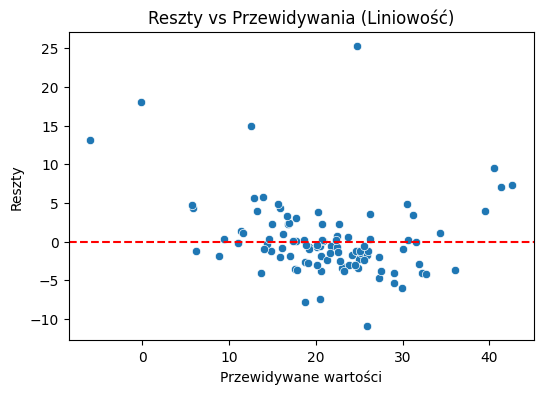

In [14]:
# predykcje i reszty
y_pred = lr.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Przewidywane wartości")
plt.ylabel("Reszty")
plt.title("Reszty vs Przewidywania (Liniowość)")
plt.show()


Wykres reszt względem przewidywanych wartości nie pokazuje wyraźnego wzorca, co sugeruje, że założenie liniowości modelu regresji liniowej jest w przybliżeniu spełnione. Większość reszt oscyluje wokół zera, choć można zauważyć kilka punktów odstających (outliers) oraz lekką nieregularność rozrzutu – co może wskazywać na pewne nieliniowe zależności, których regresja liniowa nie uchwyciła. Mimo to, ogólny rozkład jest wystarczająco równomierny, aby model był akceptowalny.

### Sprawdzenie normalności rozkładu reszt (histogram + Q-Q plot)

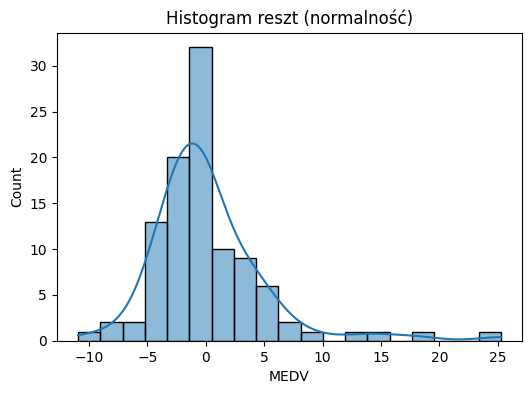

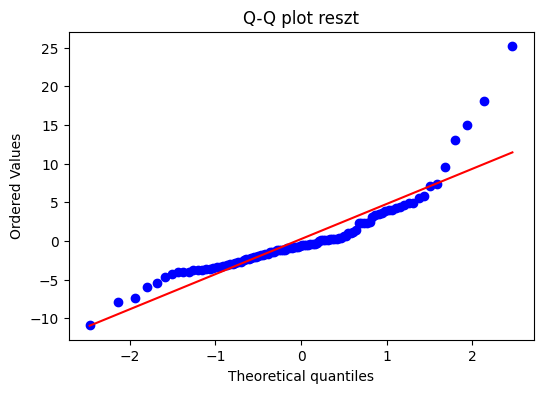

In [15]:
# Histogram
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Histogram reszt (normalność)")
plt.show()

# Q-Q plot
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot reszt")
plt.show()


**Histogram** reszt wskazuje, że rozkład jest asymetryczny i lekko skośny w prawo – co oznacza odejście od idealnej normalności.

**Wykres Q-Q (Quantile-Quantile)** pokazuje, że większość punktów leży blisko linii prostej, ale na końcach (dla bardzo dużych i bardzo małych wartości) pojawiają się odchylenia.

**Wnioski**: Rozkład reszt nie jest idealnie normalny, ale przybliżony do normalnego. Niewielkie odchylenia mogą być akceptowalne w praktyce, jednak warto je mieć na uwadze przy interpretacji wyników modelu liniowego.

### Sprawdzenie liniowości między predyktorami a zmienną objaśnianą MEDV

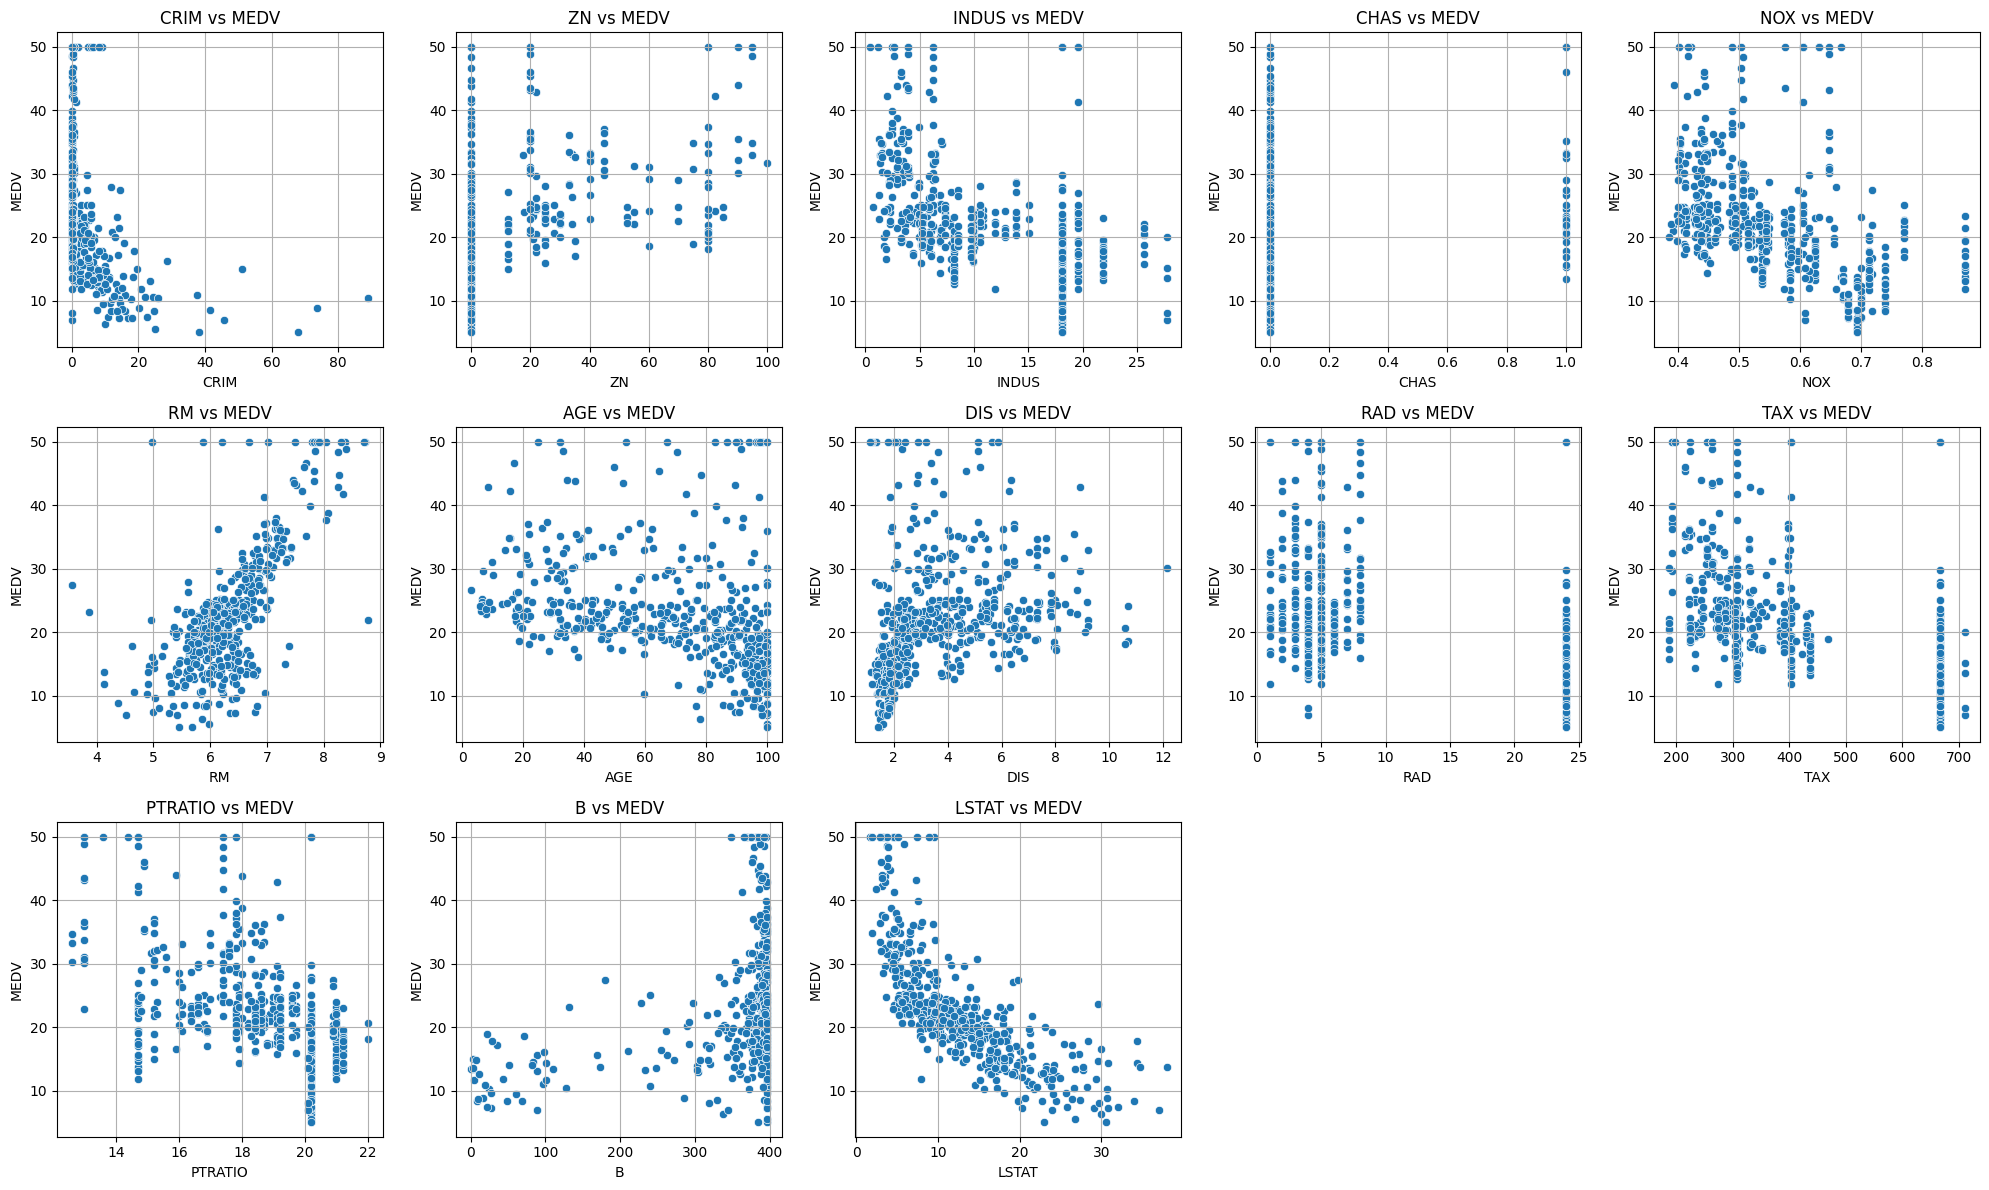

In [16]:
features = dataset.drop('MEDV', axis=1).columns

plt.figure(figsize=(20, 12))  
for idx, feature in enumerate(features):
    plt.subplot(3, 5, idx + 1) 
    sns.scatterplot(x=dataset[feature], y=dataset['MEDV'])
    plt.title(f'{feature} vs MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Interpretacja zależności między predyktorami a MEDV:

- **`RM vs MEDV`**  
  Widać silną dodatnią zależność – im więcej pokoi w domu (`RM`), tym wyższa cena (`MEDV`). Zależność ta wygląda na zbliżoną do liniowej.

- **`LSTAT vs MEDV`**  
  Silna ujemna zależność – im większy odsetek osób o niskim statusie społecznym, tym niższa cena nieruchomości. Relacja jest nieliniowa (kształt przypominający hiperbolę).

- **`CRIM vs MEDV`, `TAX vs MEDV`, `PTRATIO vs MEDV`, `NOX vs MEDV`**  
  Zmienna `MEDV` maleje wraz ze wzrostem wartości tych zmiennych, ale zależność jest nieliniowa i często rozproszona. Można rozważyć transformacje tych zmiennych.

- **`DIS vs MEDV`**  
  Lekka zależność dodatnia – większa odległość od centrum może wiązać się z wyższą ceną, ale dane są mocno rozproszone.

- **`INDUS`, `RAD`, `B`, `CHAS`**  
  Te zmienne nie wykazują wyraźnych, silnych liniowych zależności z `MEDV`. Zwłaszcza `RAD` i `CHAS` są mocno dyskretne – co może utrudniać modelowanie liniowe.


### Test normalności – Shapiro-Wilk

In [17]:
stat, p = shapiro(residuals)
print("Shapiro-Wilk test: p =", p)


Shapiro-Wilk test: p = 1.9906906865135485e-09


Interpretacja:
Wartość p < 0.05 oznacza, że możemy odrzucić hipotezę o normalności rozkładu reszt. Oznacza to, że reszty nie mają rozkładu normalnego, co jest odchyleniem od założeń regresji liniowej. 

### Test autokorelacji – Durbin-Watson

In [18]:
dw = durbin_watson(residuals)
print("Durbin-Watson:", dw)


Durbin-Watson: 1.5424192894659496


Interpretacja:
Wartość statystyki Durbin-Watsona bliska 2 oznacza brak autokorelacji reszt. Wynik 1.54 sugeruje lekką autokorelację dodatnią, jednak nie jest ona bardzo silna i może być akceptowalna w podstawowych analizach regresyjnych.